In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

%pip install nbformat
%pip install import_ipynb

import import_ipynb
import DataCleaning




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
modelGRAY = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelGRAY.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,1)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelRGB = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelRGB.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
modelGRAY.summary()
modelRGB.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [37]:
modelGRAY.add(layers.Flatten())
modelGRAY.add(layers.Dense(64, activation='relu'))
modelGRAY.add(layers.Dense(10))

modelRGB.add(layers.Flatten())
modelRGB.add(layers.Dense(64, activation='relu'))
modelRGB.add(layers.Dense(10))

In [39]:
# modelGRAY.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# #DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
# history = modelGRAY.fit(DataCleaning.TRAIN_GENERATOR_GRAY, epochs=10, validation_data=DataCleaning.TEST_GENERATOR_GRAY)

modelRGB.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history = modelRGB.fit(DataCleaning.TRAIN_GENERATOR_RGB, epochs=1, validation_data=DataCleaning.TEST_GENERATOR_RGB)

AttributeError: module 'DataCleaning' has no attribute 'TEST_GENERATOR_RGB'

2023-11-02 12:42:31.958243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 4s - loss: 0.2433 - accuracy: 0.9050 - 4s/epoch - 7ms/step


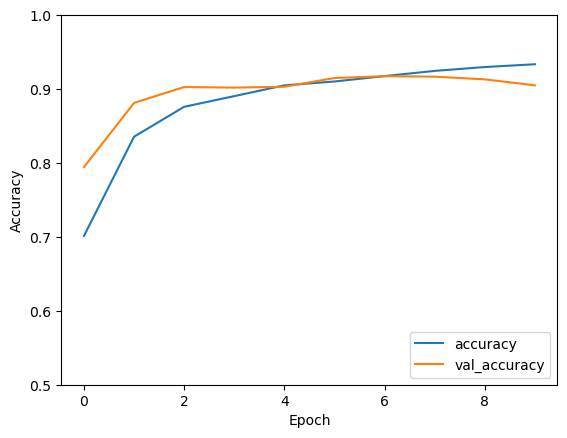

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelGRAY.evaluate(DataCleaning.TEST_GENERATOR_GRAY, verbose=2)

In [13]:
print(test_acc)

0.9049999713897705
